In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib.path import Path
import matplotlib.pyplot as plt

# testing point 

In this script We generate points to mesure. Corners of Blonia:
50°03'45.2"N 19°54'09.1"E
50°03'37.3"N 19°54'03.1"E
50°03'25.1"N 19°54'25.9"E
50°03'33.2"N 19°55'26.0"E

In [2]:
def to_decimal(deg,min,sec):
    return deg + (1/60)*min + (1/3600)*sec 

In [3]:
point_1_y = to_decimal(50,3,45.2)
point_1_x = to_decimal(19,54,9.1)
point_2_y = to_decimal(50,3,37.3)
point_2_x = to_decimal(19,54,3.1)
point_3_y = to_decimal(50,3,25.1)
point_3_x = to_decimal(19,54,25.9)
point_4_y = 50.059240
point_4_x = 19.923921

In [4]:
AD = 1518.1 # m
AB = 243.4  # unprecise dimensions of Blonia
BC = 604.9
CD = 1130.7
#jump_y

In [5]:
left = point_2_x            # making squere that will be used to generate points that will be sorted
right = point_4_x
up = point_1_y
down = point_3_y

In [6]:
jump_x = (left - right)/81  # generating list of longitudes and latitudes, x and y coordinates of points
jump_y = (down - up)/30
list_x = np.array(right)
list_y = np.array(up)
for i in range(1,81):
    list_x = np.append(list_x,right + i*jump_x)
for i in range(1,30):
    list_y = np.append(list_y,up + i*jump_y)


In [7]:
fin = []                    # generating squere gird of points 
for j in range(30):
    for i in range(81):
        fin.append([list_x[i],list_y[j]])

In [8]:
Ax = point_1_x
Ay = point_1_y
Bx = point_2_x
By = point_2_y
Cx = point_3_x
Cy = point_3_y
Dx = 19.923921
Dy = 50.059240
Ey = By
Ex = 50.0637389875082
Dx

19.923921

In [9]:
def sign(p1,p2,p3):
    return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

def PointInTriangle(pt,v1,v2,v3):
    d1 = sign(pt, v1, v2)
    d2 = sign(pt, v2, v3)
    d3 = sign(pt, v3, v1)
    has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
    has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)

    return not(has_neg and has_pos)


In [10]:
triangle = [[Ax,Ay],[Bx,By],[Cx,Cy],[Dx,Dy],[Ex,Ey]]
last_one = []
for i in range(len(fin)):
    InTriangle = PointInTriangle(fin[i], triangle[0], triangle[1], triangle[2])
    if InTriangle:
        last_one.append(fin[i])

for i in range(len(fin)):
    InTriangle = PointInTriangle(fin[i], triangle[0], triangle[3], triangle[2])
    if InTriangle:
        last_one.append(fin[i])
last_one

[[19.902569251028805, 50.06236944444444],
 [19.902569251028805, 50.06218333333333],
 [19.90228456104252, 50.06218333333333],
 [19.90285394101509, 50.061997222222224],
 [19.902569251028805, 50.061997222222224],
 [19.90228456104252, 50.061997222222224],
 [19.90313863100137, 50.06181111111111],
 [19.90285394101509, 50.06181111111111],
 [19.902569251028805, 50.06181111111111],
 [19.90228456104252, 50.06181111111111],
 [19.90199987105624, 50.06181111111111],
 [19.90313863100137, 50.061625],
 [19.90285394101509, 50.061625],
 [19.902569251028805, 50.061625],
 [19.90228456104252, 50.061625],
 [19.90199987105624, 50.061625],
 [19.903423320987653, 50.06143888888889],
 [19.90313863100137, 50.06143888888889],
 [19.90285394101509, 50.06143888888889],
 [19.902569251028805, 50.06143888888889],
 [19.90228456104252, 50.06143888888889],
 [19.90199987105624, 50.06143888888889],
 [19.901715181069957, 50.06143888888889],
 [19.903423320987653, 50.061252777777774],
 [19.90313863100137, 50.061252777777774],
 

In [11]:

NumFinn = np.array(last_one)
# dictionary of lists  
dict = {'latitude': NumFinn.T[0], 'longitude': NumFinn.T[1]}  
       
df = pd.DataFrame(dict) 
    
# saving the dataframe 
df.to_csv('PoinsBlona_part_two.csv') 

In [12]:
part_two = np.array(last_one)
part_two.T[0]

array([19.90256925, 19.90256925, 19.90228456, ..., 19.90769367,
       19.90740898, 19.90712429])

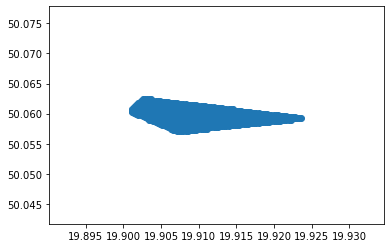

In [13]:

plt.scatter(part_two.T[0], part_two.T[1])

In [14]:
BBox = (19.899, 19.9255,      
         50.0562, 50.0637)


In [15]:
Blonia = plt.imread('map(1).png')

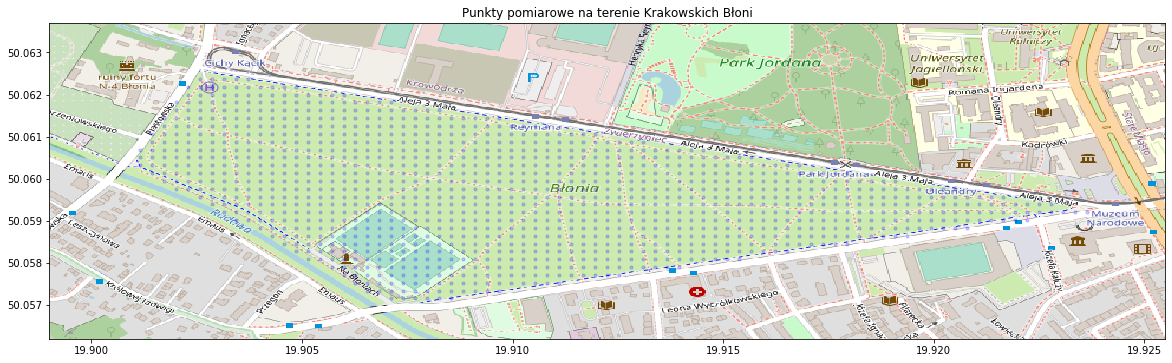

In [16]:
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(part_two.T[0], part_two.T[1], zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Punkty pomiarowe na terenie Krakowskich Błoni')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal')

In [17]:
import csv
file = open('24_01_2022.csv')
csvreader = csv.reader(file)
header = []
header = next(csvreader)
rows = []
for row in csvreader:
        rows.append(row)
file.close()

In [18]:

for j in range(len(rows)):
    rows[j][0]=float(rows[j][0])
    rows[j][2]=float(rows[j][2])

1166

In [19]:

longitude = []
latitude = []
vertical = []
horizontal = []
test_lon = []
test_lat = []
id=[]

longitude_measured = []
latitude_measured = []
vertical_measured = []
horizontal_measured = []
test_lon_measured = []
test_lat_measured = []
id_measured = []
for i in range(len(rows)):
    longitude.append(rows[i][6])
    latitude.append(rows[i][7])
    vertical.append(rows[i][8])
    horizontal.append(rows[i][10])
    test_lon.append(rows[i][4])
    test_lat.append(rows[i][5])
    id.append(rows[i][0])
    if rows[i][2]==-2:
        id_measured.append(rows[i][0])
        longitude_measured.append(rows[i][6])
        latitude_measured.append(rows[i][7])
        vertical_measured.append(rows[i][8])
        horizontal_measured.append(rows[i][10])
        test_lon_measured.append(rows[i][4])
        test_lat_measured.append(rows[i][5])


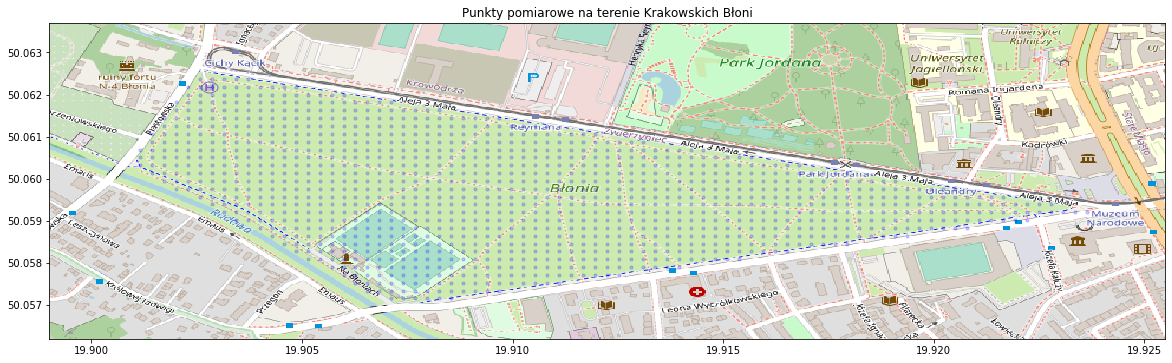

In [20]:
# not_mesured=part_two[92:]
# fig, ax = plt.subplots(figsize = (20,10))
# ax.scatter(part_two.T[0], part_two.T[1], zorder=1, alpha= 0.2, c='b', s=10)
# ax.set_title('Punkty pomiarowe na terenie Krakowskich Błoni')
# ax.set_xlim(BBox[0],BBox[1])
# ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal')

In [21]:
coordinates_measured = []
for i in range(len(latitude_measured)):
    coordinates_measured.append([float(longitude_measured[i]),float(latitude_measured[i])])
coordinates_measured=np.array(coordinates_measured)

In [22]:
vertical_measured=np.array([float(i) for i in vertical_measured])
vertical_measured_range = max(vertical_measured) - min(vertical_measured)
vertical_measured_normalized = []
for i in range(len(vertical_measured)):
    vertical_measured_normalized.append((vertical_measured[i]-min(vertical_measured))/vertical_measured_range)
#colors = np.array([float(i) for i in vertical_measured])*-0.01
colors=vertical_measured_normalized

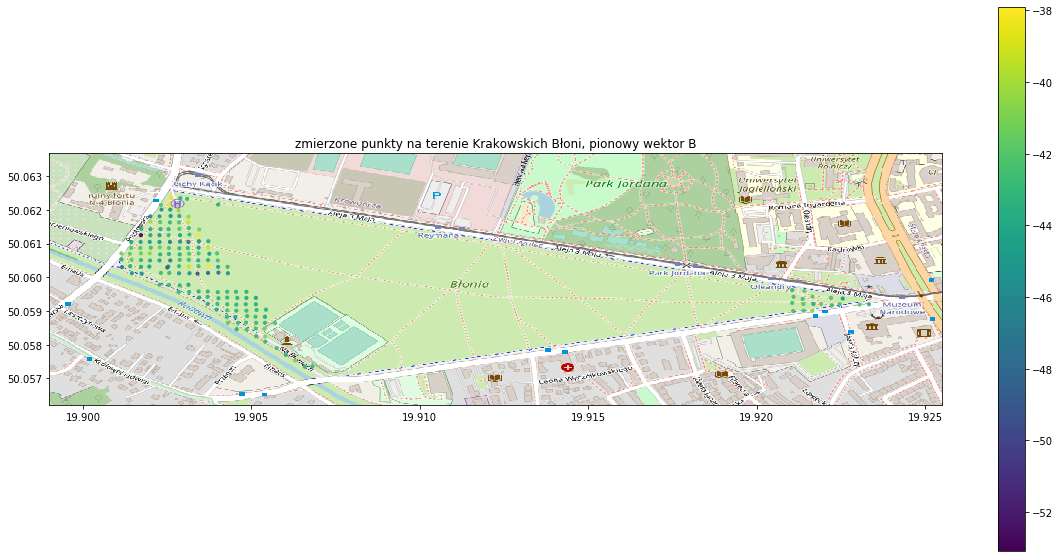

In [23]:
#colors = np.array([float(i) for i in vertical_measured])*-0.01
points_measured=coordinates_measured
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(points_measured.T[0], points_measured.T[1], zorder=1, alpha= 0.9, c=colors, s=10)
ax.set_title('zmierzone punkty na terenie Krakowskich Błoni, pionowy wektor B')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal',vmin=min(vertical_measured),vmax=max(vertical_measured))
fig.colorbar(im,ax=ax)

In [24]:
horizontal_measured=np.array([float(i) for i in horizontal_measured])
horizontal_measured_range = max(horizontal_measured) - min(horizontal_measured)
horizontal_measured_normalized = []
for i in range(len(horizontal_measured)):
    horizontal_measured_normalized.append((horizontal_measured[i]-min(horizontal_measured))/horizontal_measured_range)
#colors = np.array([float(i) for i in horizontal_measured])*-0.01
colors=horizontal_measured_normalized

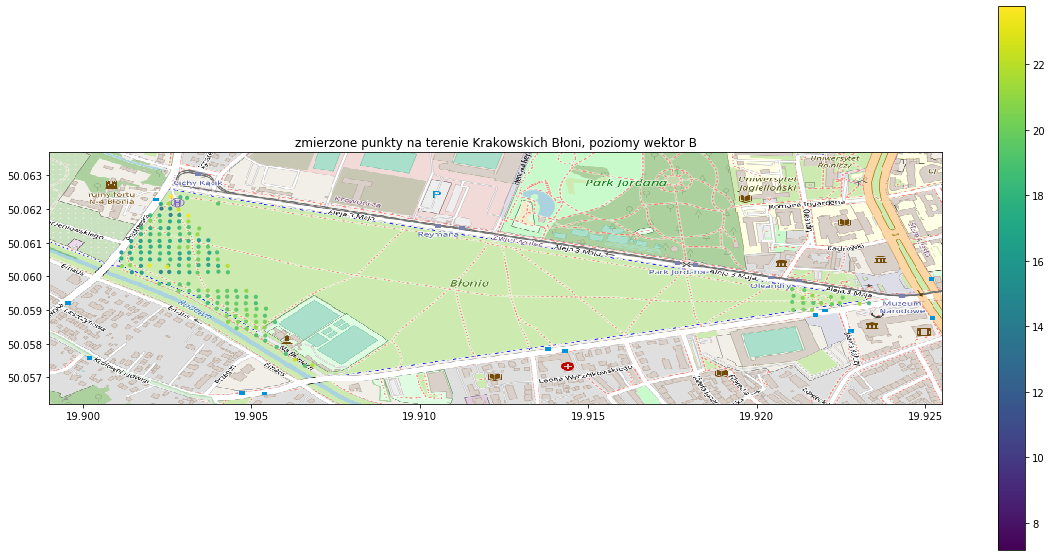

In [25]:
points_measured=coordinates_measured
fig, ax = plt.subplots(figsize = (20,10))
ax.scatter(points_measured.T[0], points_measured.T[1], zorder=1, alpha= 0.9, c=colors, s=10)
ax.set_title('zmierzone punkty na terenie Krakowskich Błoni, poziomy wektor B')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
im = ax.imshow(Blonia, zorder=0, extent = BBox, aspect= 'equal', vmin=min(horizontal_measured),vmax=max(horizontal_measured))
fig.colorbar(im,ax=ax)


In [141]:
colors

array([0.2377492, 0.2144259, 0.1686738, 0.2243122, 0.1503313, 0.1347632,
       0.2340471, 0.1608719, 0.1397648, 0.1776814, 0.1835022, 0.2138633,
       0.1757792, 0.1706306, 0.1917264, 0.2037572, 0.2033382, 0.1885174,
       0.1846521, 0.161941 , 0.1761758, 0.1720543, 0.1837135, 0.2100701,
       0.1917274, 0.1866985, 0.1839803, 0.1920387, 0.1790838, 0.1757472,
       0.1656268, 0.1562847, 0.1767591, 0.168932 , 0.1734348, 0.1721555,
       0.1722553, 0.1607169, 0.1578727, 0.1940401, 0.1854162, 0.2104738,
       0.203295 , 0.1759842, 0.1731744, 0.1736812, 0.1717072, 0.1678833,
       0.1859643, 0.1673825, 0.2015957, 0.1738817, 0.1629768, 0.1774215,
       0.1830396, 0.1703252, 0.1699558, 0.1621813, 0.1572116, 0.2025467,
       0.1751064, 0.1998648, 0.1686419, 0.162449 , 0.1816855, 0.1718759,
       0.166383 , 0.1736528, 0.1755553, 0.1736873, 0.2197397, 0.1706269,
       0.1634055, 0.1764727, 0.1962215, 0.1787946, 0.1738511, 0.2343702,
       0.233628 , 0.1581114, 0.2071938, 0.20983  , 